# Analysis - exp24

Game projection

In [66]:
import os
import csv
import numpy as np
import pandas as pd
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

from notebook_helpers import load_evaluated

# Load the data

In [67]:
games = [
    ("Wythoff15x15", 15),
    ("Wythoff50x50", 50),
    ("Wythoff100x100", 100),
    ("Wythoff150x150", 150),
    ("Wythoff200x200", 200),
    ("Wythoff250x250", 250),
    ("Wythoff300x300", 300),
    ("Wythoff350x350", 350),
    ("Wythoff400x400", 400),
    ("Wythoff450x450", 450),
    ("Wythoff500x500", 500)
]

# GREEDY
path = "/Users/type/Code/azad/data/wythoff/exp24a/"

table_a = {}
for game in games:
    files = glob(os.path.join(path, "run_*_{}.csv".format(game[0])))
    data = load_evaluated(files, game[1])
    
    for k, v in data.items():
        try:
            table_a[k].extend(v)
        except:
            table_a[k] = v
table_a = pd.DataFrame(table_a)

# RANDOM
path = "/Users/type/Code/azad/data/wythoff/exp24b/"
table_b = {}
for game in games:
    files = glob(os.path.join(path, "run_*_{}.csv".format(game[0])))
    data = load_evaluated(files, game[1])
    
    for k, v in data.items():
        try:
            table_b[k].extend(v)
        except:
            table_b[k] = v
table_b = pd.DataFrame(table_b)

In [68]:
table_a.head()

,file_index,file_name,game_code,strategist_score,stumbler_score,wins
0,0,run_14_Wythoff15x15,15,0.0128,0.7422,86.0
1,1,run_7_Wythoff15x15,15,0.2426,0.8880,73.0
2,2,run_3_Wythoff15x15,15,0.3813,0.8157,85.0
3,3,run_10_Wythoff15x15,15,0.2215,0.8863,71.0
4,4,run_8_Wythoff15x15,15,0.1629,0.8636,92.0


In [69]:
table_b.head()

,file_index,file_name,game_code,strategist_score,stumbler_score,wins
0,0,run_14_Wythoff15x15,15,0.8418,0.0718,979.0
1,1,run_7_Wythoff15x15,15,0.8707,0.0823,948.0
2,2,run_3_Wythoff15x15,15,0.8632,0.0618,982.0
3,3,run_10_Wythoff15x15,15,0.7515,0.0578,977.0
4,4,run_8_Wythoff15x15,15,0.8031,0.0726,981.0


# Plots
## Greedy stumler

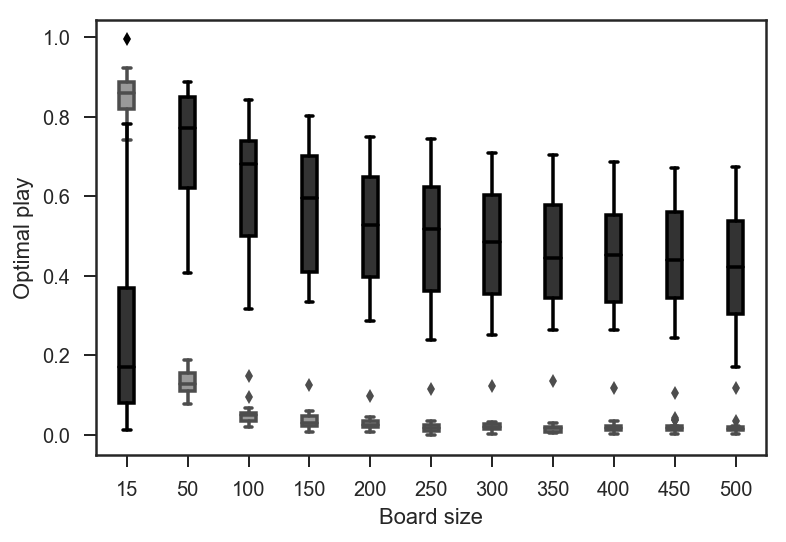

In [70]:
ax1= sns.boxplot(x="game_code", y="stumbler_score", data=table_a, 
                 color="grey", width=0.25)
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

ax2 = sns.boxplot(x="game_code", y="strategist_score", data=table_a, 
                  color="black", width=0.25)
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))
    
ax2.set_ylabel("Optimal play")
ax2.set_xlabel("Board size")

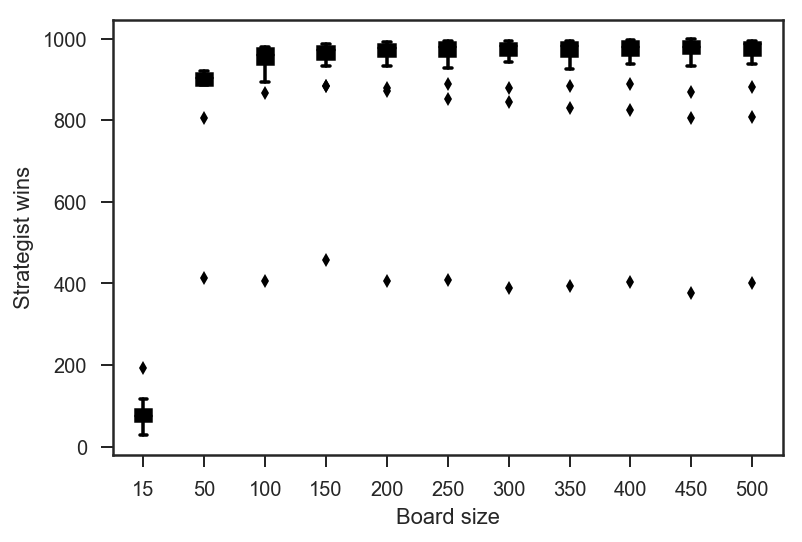

In [71]:
ax1 = sns.boxplot(x="game_code", y="wins", data=table_a, 
                 color="black", width=0.25)

ax1.set_ylabel("Strategist wins")
ax1.set_xlabel("Board size")

## Random stumbler

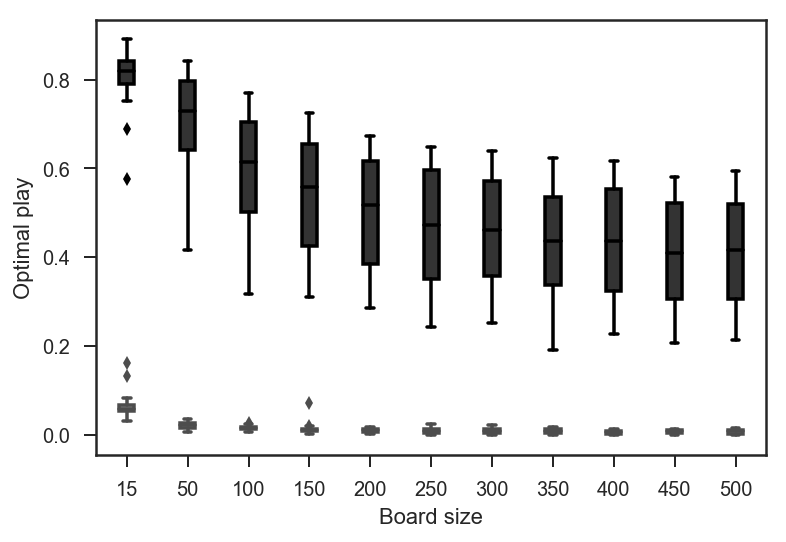

In [72]:
ax1= sns.boxplot(x="game_code", y="stumbler_score", data=table_b, 
                 color="grey", width=0.25)
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

ax2 = sns.boxplot(x="game_code", y="strategist_score", data=table_b, 
                  color="black", width=0.25)
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))
    
ax2.set_ylabel("Optimal play")
ax2.set_xlabel("Board size")

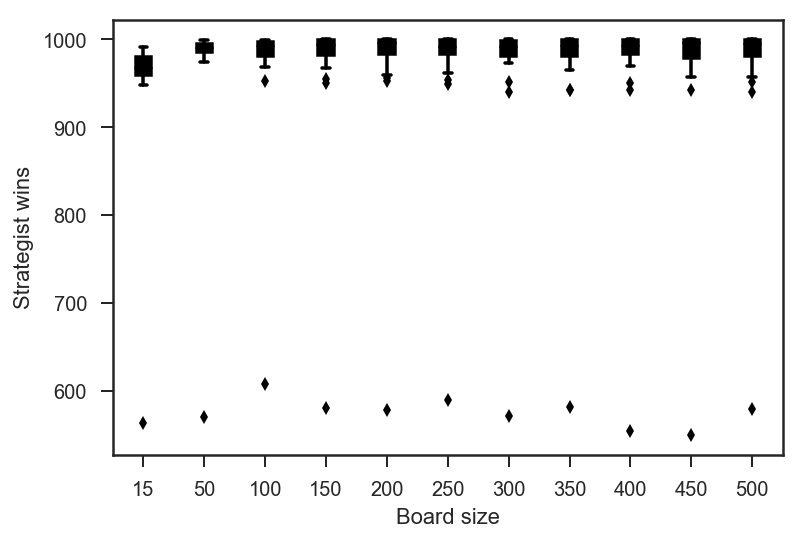

In [73]:
ax1 = sns.boxplot(x="game_code", y="wins", data=table_b, 
                 color="black", width=0.25)

ax1.set_ylabel("Strategist wins")
ax1.set_xlabel("Board size")